# Crime Rate Prediction & Analysis Project

## Project Objectives
1. Understand and analyze crime data (EDA)
2. Clean and preprocess the data (Data Cleaning & Preprocessing)
3. Split the data into training and testing sets
4. Apply two data mining algorithms (KMeans, DecisionTree)
5. Evaluate the results
6. Visualize the data in multiple ways (Histogram, Pie, Box, Scatter)


In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


## 1. Load the Data

In [2]:
# Adjust the path if needed
df = pd.read_csv('train.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 2. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [4]:
df.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


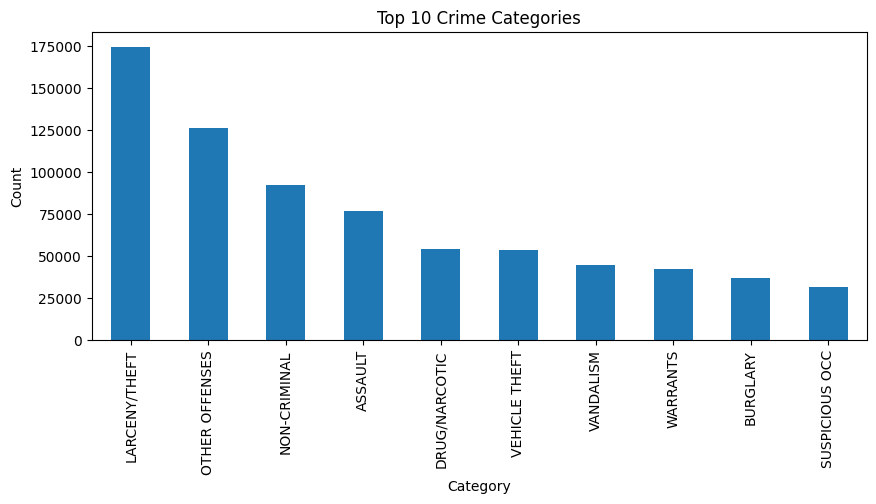

In [5]:
df['Category'].value_counts().head(10).plot(kind='bar', figsize=(10,4), title='Top 10 Crime Categories')
plt.ylabel('Count')
plt.show()

## 3. Data Cleaning

In [6]:
# Remove missing values
df = df.dropna()
# Remove duplicates
df = df.drop_duplicates()
# Convert Dates
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
# Remove invalid coordinates
df = df[(df['X'] != 0) & (df['Y'] != 0)]
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 4. Data Normalization

In [7]:
scaler = StandardScaler()
df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])
df[['X', 'Y']].head()

,X,Y
0,-0.107651,0.007795
1,-0.107651,0.007795
2,-0.057306,0.064223
3,-0.144000,0.065225
4,-0.530728,0.001112


## 5. Split Data into Train/Test

In [8]:
le = LabelEncoder()
df['Category_enc'] = le.fit_transform(df['Category'])
X = df[['X', 'Y']]
y = df['Category_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((613008, 2), (262718, 2))

## 6. KMeans Clustering

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters
kmeans.cluster_centers_

array([[ 8.49348831e-01, -1.80772763e-02],
       [-5.80965178e-01, -2.06335859e-02],
       [ 6.33208558e+01,  1.14162494e+02],
       [-1.89170801e+00, -3.72917664e-02],
       [ 2.47550906e-01,  6.66098541e-03]])

## 7. Decision Tree Classification

In [10]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
labels = np.unique(y)  # Use all possible classes
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=labels)
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(cm)
print('Classification Report:\n', classification_report(y_test, y_pred, labels=labels, target_names=le.classes_))

Accuracy: 0.2343577524189435
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                              precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       462
                    ASSAULT       0.00      0.00      0.00     23200
                 BAD CHECKS       0.00      0.00      0.00       117
                    BRIBERY       0.00      0.00      0.00        96
                   BURGLARY       0.00      0.00      0.00     10958
         DISORDERLY CONDUCT       0.00      0.00      0.00      1295
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       680
              DRUG/NARCOTIC       0.23      0.44      0.30     16230
                DRUNKENNESS       0.00      0.00      0.00      1297
               EMBEZZLEMENT       0.00      0.00      0.00       337
                  EXTORTION       0.00      0.00 

/Users/macbook/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macbook/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macbook/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 8. Visualizations

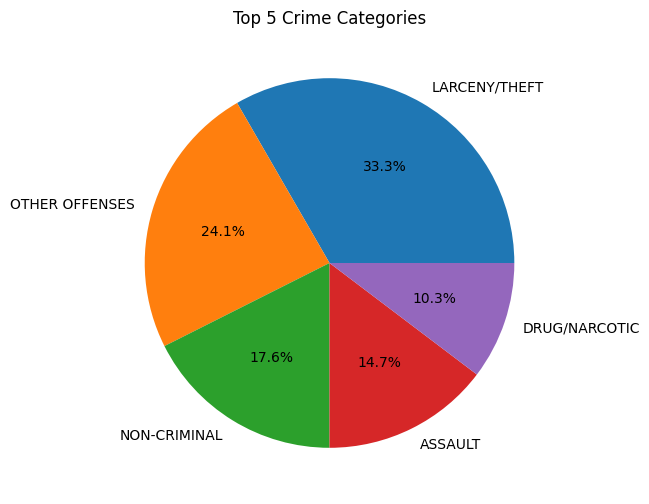

In [11]:
# Pie Chart
df['Category'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Top 5 Crime Categories')
plt.ylabel('')
plt.show()

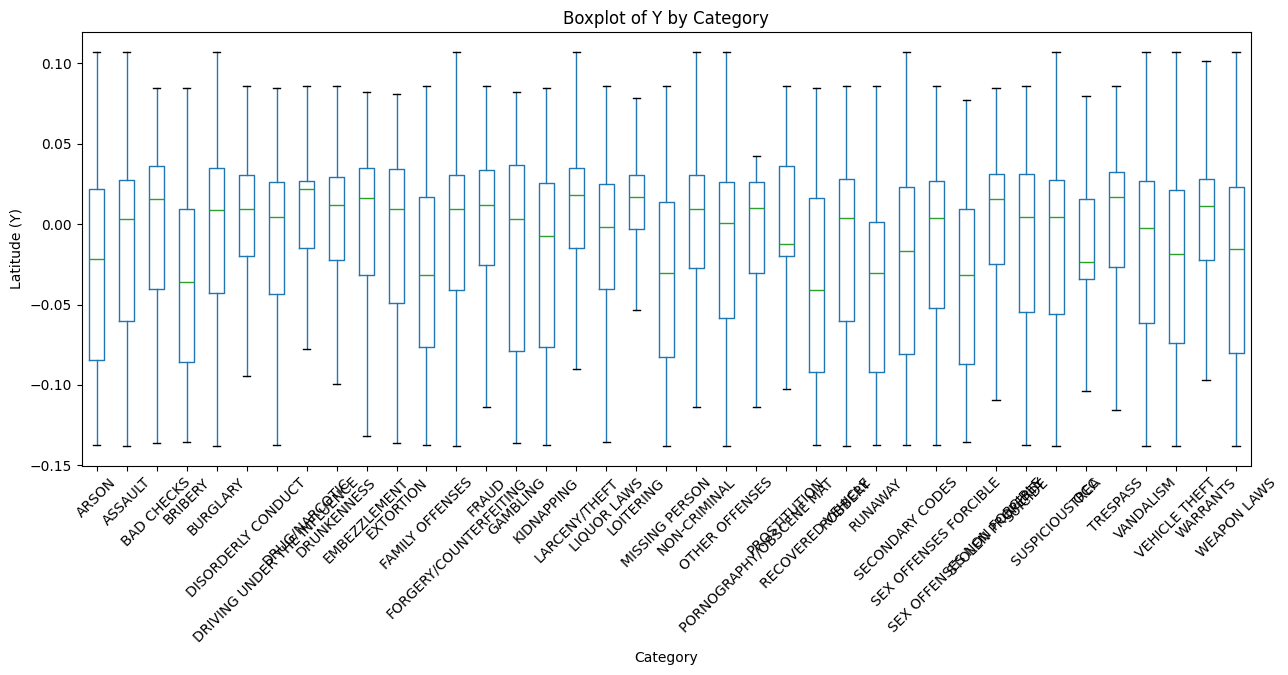

In [14]:
# Box Plot
df.boxplot(column='Y', by='Category', grid=False, showfliers=False, figsize=(13,7))
plt.title('Boxplot of Y by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Latitude (Y)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

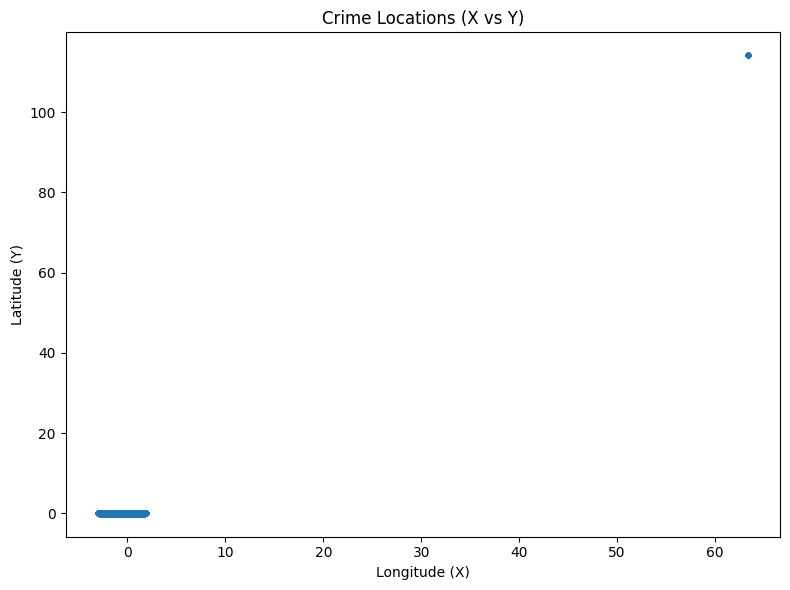

In [13]:
# Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(df['X'], df['Y'], alpha=0.2, s=10)
plt.title('Crime Locations (X vs Y)')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.tight_layout()
plt.show()